In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "True"

import torch
from flow_matching.path.scheduler import CondOTScheduler, VPScheduler
from matplotlib import pyplot as plt

In [2]:
# Time steps and schedules
T = 3000
t = torch.linspace(0, 1, steps=T)

ot_schedule = CondOTScheduler()(t)
vp_schedule = VPScheduler()(t)

In [3]:
# Data point and noise samples (same setup as alpha_beta.ipynb)
x_1 = torch.tensor([5.0, 5.0])  # target / data
n_paths = 10
x_0s = torch.randn(n_paths, 2)     # source / noise samples

def fm_path(x_0, x_1, alpha_t, sigma_t):
    """Compute affine path x_t = alpha_t * x_1 + sigma_t * x_0 for all t."""
    # alpha_t, sigma_t: [T], x_0, x_1: [2]
    return alpha_t.unsqueeze(-1) * x_1 + sigma_t.unsqueeze(-1) * x_0

# Compute paths for both schedules
ot_paths = [fm_path(x_0, x_1, ot_schedule.alpha_t, ot_schedule.sigma_t) for x_0 in x_0s]
vp_paths = [fm_path(x_0, x_1, vp_schedule.alpha_t, vp_schedule.sigma_t) for x_0 in x_0s]

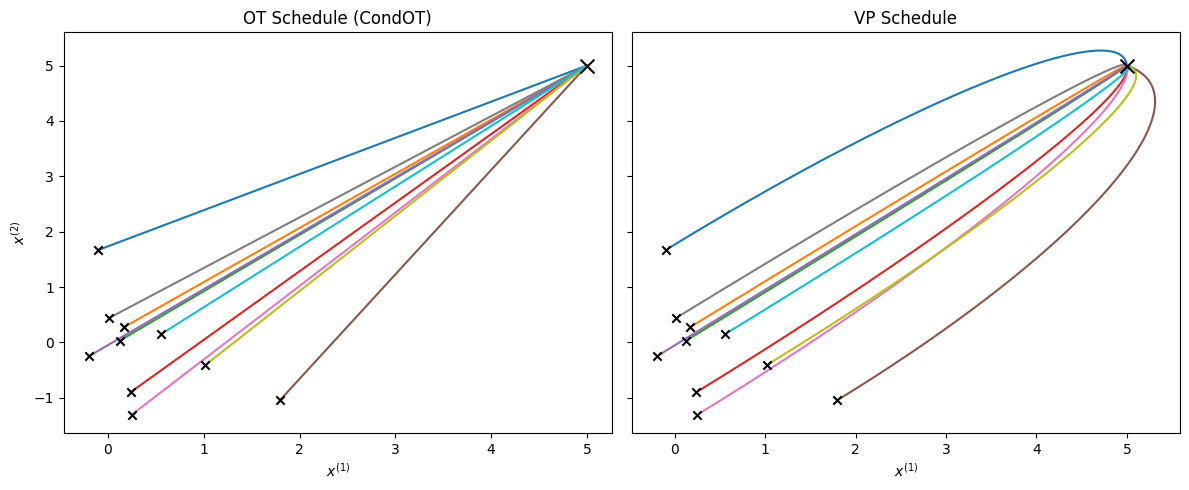

In [4]:
# Plot both schedules side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

for path, x_0 in zip(ot_paths, x_0s):
    axes[0].plot(*path.T)
    axes[0].scatter(*x_0, marker='x', c='black', zorder=5)
axes[0].scatter(*x_1, marker='x', c='black', s=100, zorder=5)
axes[0].set_title('OT Schedule (CondOT)')
axes[0].set_xlabel('$x^{(1)}$')
axes[0].set_ylabel('$x^{(2)}$')

for path, x_0 in zip(vp_paths, x_0s):
    axes[1].plot(*path.T)
    axes[1].scatter(*x_0, marker='x', c='black', zorder=5)
axes[1].scatter(*x_1, marker='x', c='black', s=100, zorder=5)
axes[1].set_title('VP Schedule')
axes[1].set_xlabel('$x^{(1)}$')

plt.tight_layout()
plt.show()